In [1]:
%alias package {__import__('sys').executable} -m pip install --quiet --upgrade --upgrade-strategy eager %l

In [2]:
a = 1

In [3]:
a

1

In [2]:
session_storage = 'downloads'

import os
os.makedirs(session_storage, exist_ok=True)

In [3]:
%package fsspec

import fsspec

fs_dataset = fsspec.filesystem(
    'simplecache', 
    target_protocol='https', 
    cache_storage=session_storage
)

In [4]:
%package numpy pandas 

import numpy as np
import pandas as pd
'''
%package swifter
import swifter
swifter.set_defaults(
    npartitions=None,
    dask_thres=1,
    scheduler='processes',
    progress_bar=True,
    progress_bar_desc=None,
    allow_dask_on_strings=True,
    force_parallel=False
)
'''

%package scikit-learn
import sklearn as skl
import sklearn.base
import sklearn.compose
#import sklearn.ensemble
import sklearn.feature_extraction
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.pipeline
#import sklearn.svm

#%package scikit-learn-intelex
#import sklearnex
#sklearnex.patch_sklearn()

#%package xgboost
#import xgboost

In [5]:
%package tensorflow tensorflow-gpu

import tensorflow as tf
from tensorflow import keras as keras

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

2022-12-08 09:12:34.537096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 09:12:34.862577: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-08 09:12:36.145894: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib/:/opt/conda/lib/
2022-12-0

In [6]:
%package tensorflow-addons
import tensorflow_addons as tfa

%package tensorboard
%load_ext tensorboard 

/opt/conda/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [7]:
%package scikeras

import scikeras as skeras
import scikeras.wrappers

In [8]:
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
def set_constrained_layout(plt):
    plt.rcParams['figure.constrained_layout.use'] = True
set_constrained_layout(plt)

plt.style.use('default')

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def subplots(
    n, 
    ncols = 1, visible = False, 
    *args, **kwargs
):
    fig, axs = plt.subplots(
        *args, **kwargs,
        ncols=ncols, 
        nrows=int(np.ceil(n / ncols))
    )
    for ax in axs.flatten():
        ax.set(visible=visible)
    return fig, axs

## Dataset

In [10]:
# TODO
df_scripts = pd.read_pickle('./dataset.pkl', compression='gzip')

In [11]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,[\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,[\r\n\r\n\r\n HOW T...
2,Scream,[ \r\n ...
3,Groundhog Day,[\r\n\r\n \r\n ...
4,Black Panther,[\r\n\r\n\r\n \r\n BL...
...,...,...
1204,You've Got Mail,[\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\t...
1205,Youth in Revolt,[ \r\n \r\n\r\n ...
1206,Zero Dark Thirty,[\r\n\r\n \r\n ...
1207,Zerophilia,[\r\n\r\n\r\n\r\n ...


In [12]:
df_scripts = df_scripts.astype({
    'movie_name': 'category'
})

In [13]:
df_scripts = df_scripts.explode('script_text', ignore_index=True)

In [14]:
df_scripts.dropna(inplace=True)
df_scripts.reset_index(drop=True, inplace=True)

In [15]:
df_scripts

,movie_name,script_text
0,Reservoir Dogs,\r\n\r\n\r\n\r\n\r\n\r\n ...
1,How to Train Your Dragon,\r\n\r\n\r\n HOW TO...
2,Scream,\r\n ...
3,Groundhog Day,\r\n\r\n \r\n ...
4,Black Panther,\r\n\r\n\r\n \r\n BLA...
...,...,...
1172,You've Got Mail,\r\n\r\nYou've Got Mail\r\n\r\n\r\n\r\n\t\t\tY...
1173,Youth in Revolt,\r\n \r\n\r\n ...
1174,Zero Dark Thirty,\r\n\r\n \r\n ...
1175,Zerophilia,\r\n\r\n\r\n\r\n ...


TODO
GOAL extract the following features from texts:

Feature engineering TODO list: 
- location: Named Entity Recognition
- character: Named Entity Recognition
    see https://keras.io/examples/nlp/ner_transformers/
    see https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
- convo: ??

sentence embedding?

## Feature Engineering

In [16]:
def str_normalize_eol(s, eol=os.linesep):
    return str.join(eol, str.splitlines(s))

In [17]:
%package joblib

import os
import re

import joblib

class ParagraphExtractor(skl.base.TransformerMixin):
    def __init__(self,
        eol=os.linesep,
        eol_freq_min=2,
        n_jobs=1
    ):
        self.eol = eol
        self.eol_freq_min = eol_freq_min
        self.n_jobs = n_jobs

        self._pattern = re.compile(
            fr'(?:{self.eol}\s*?){{{self.eol_freq_min},}}'
        )

    def fit(self, _X, _y=None):
        return self

    def transform(self, X, _y=None):
        def _impl_single(s):
            nonlocal self
            return re.split(
                self._pattern,
                str_normalize_eol(s, eol=self.eol)
            )

        return joblib.Parallel(n_jobs=self.n_jobs)(
            joblib.delayed(_impl_single)(s)
                for s in X
        )

        
df_scripts['script_paragraphs'] = ParagraphExtractor(n_jobs=-1).fit_transform(
    df_scripts['script_text']#.iloc[:100]
)

In [18]:
df_scripts_para = (
    df_scripts[['movie_name', 'script_paragraphs']]
        .explode('script_paragraphs', ignore_index=True)
)

In [19]:
df_scripts_para['script_paragraphs'] = (
    df_scripts_para['script_paragraphs'].str.strip()
)

In [20]:
df_scripts_para = df_scripts_para[
    # non-empty strings
    df_scripts_para['script_paragraphs'].astype(bool)
]

In [21]:
df_scripts_para['movie_name'] = (
    df_scripts_para['movie_name']
        .cat.remove_unused_categories()
)

In [22]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
2,Reservoir Dogs,R E S E R V O I R D O G S
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [23]:
import string

def _str_letters(s):
    return s.translate(
        str.maketrans(
            '', '', 
            string.punctuation + string.whitespace
        )
    )

def _df_lower_letters(df):
    return _str_letters(df.str).str.lower()

df_scripts_para = df_scripts_para[
    _df_lower_letters(df_scripts_para['movie_name'])
        != _df_lower_letters(df_scripts_para['script_paragraphs'])
]


In [24]:
df_scripts_para

,movie_name,script_paragraphs
1,Reservoir Dogs,Quentin Tarantino's
3,Reservoir Dogs,"October 22, 1990"
4,Reservoir Dogs,-----------------
5,Reservoir Dogs,This movie is dedicated to these following sou...
6,Reservoir Dogs,inspiration:
...,...,...
1999878,Zootopia,NICK\n Flash? Flash? Hundred yard dash?!
1999879,Zootopia,Yep. It's Flash the sloth.
1999880,Zootopia,FLASH\n (several beats)\n ...
1999881,Zootopia,CUT TO BLACK:


In [25]:
df_n_paras = df_scripts_para.groupby('movie_name').count()

In [26]:
df_n_paras[df_n_paras['script_paragraphs'] < 10]

,script_paragraphs
movie_name,
Ace Ventura: Pet Detective,3
American Outlaws,1
Days of Heaven,2
Erik the Viking,2
Fletch,2
Four Feathers,8
Highlander: Endgame,4
Made,1
Never Been Kissed,5


In [27]:
# TODO treat these samples separately
# e.g. those without line breaks between paragraphs 
# (so only one line break after each para)

df_scripts_outliers = df_scripts_para[
    df_scripts_para['movie_name'].isin(
        df_n_paras[df_n_paras['script_paragraphs'] < 10].index
    )
]
df_scripts_outliers

,movie_name,script_paragraphs
62411,Ace Ventura: Pet Detective,"""ACE VENTUREA, PET DETECTIVE by Jack Bernstein..."
62412,Ace Ventura: Pet Detective,<b><!--\n</b>if (window!= top)\ntop.location.h...
62413,Ace Ventura: Pet Detective,ACE VENTURA\nPET DETECTIVE\nWritten by\nJack B...
124380,American Outlaws,"""American Outlaws"" -- by Roderick Taylor and J..."
531559,Days of Heaven,<b><!--\n</b>if (window!= top)\ntop.location.h...
531560,Days of Heaven,"DAYS OF HEAVEN""\nby Terry Malick\nREVISED: 6/2..."
625485,Erik the Viking,<b><!--\n</b>if (window!= top)\ntop.location.h...
625486,Erik the Viking,ERIK THE VIKING - Terry Jones ---------------\...
683430,Fletch,Fletch - by Phil Alden Robinson from a draft b...
683431,Fletch,"<b> \n</b>body{\n\tfont-family: ""Courier New"",..."


In [28]:
# TODO lxml to parse html
#print(df_scripts[df_scripts['movie_name'] == 'They Script'].iloc[0]['script_text'][:10000])

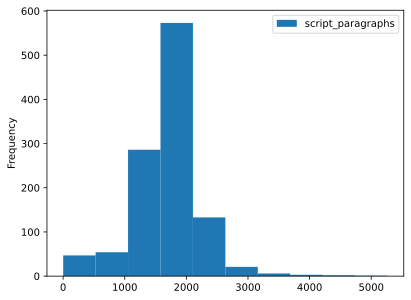

In [29]:
_ = df_n_paras.plot.hist()

## Models

### Neural Network (LSTM RNN)

#### Text Transformers

In [83]:
class KerasTextVectorizer(skl.base.TransformerMixin):
    def __init__(self, 
        vocabulary=None, **kwargs
    ):
        self._has_vocab = vocabulary is not None
        
        self.base = keras.Sequential([
            keras.layers.InputLayer(input_shape=(), dtype='string'),
            keras.layers.TextVectorization(
                **kwargs, 
                name='text_vec',
                vocabulary=vocabulary
            )
        ])

    def vocabulary_size(self):
        return self.base.get_layer('text_vec').vocabulary_size()

    def fit(self, X, _y=None):
        if not self._has_vocab:
            self.base.get_layer('text_vec').adapt(X)

        self.base.compile()
        return self

    def transform(self, X, _y=None):
        return self.base(X)

    def __getstate__(self):
        return dict(
            config=self.base.get_config(),
            weights=self.base.get_weights(),
            has_vocab=self._has_vocab
        )

    def __setstate__(self, d):
        self.base = keras.Sequential.from_config(d['config'])
        if not tf.equal(tf.size(d['weights']), 0):
            self.base.set_weights(d['weights'])
        self._has_vocab = d['has_vocab']

In [31]:
%package spacy[cuda-autodetect,transformers,lookups]

class SpacyTextVectorizer(KerasTextVectorizer):
    def __init__(self, **kwargs):
        import spacy
        #import spacy_transformers
        spacy.prefer_gpu()
        
        #spacy.cli.download('en_core_web_lg', False, False, '--quiet')

        nlp = spacy.load('en_core_web_lg')
        super().__init__(
            vocabulary=list(nlp.vocab.strings),
            **kwargs
        )

#### Classifier

In [84]:
class KerasTextClassifier(skeras.wrappers.KerasClassifier):
    def __init__(self, vocabulary_size, **kwargs):
        super().__init__(**kwargs)
        self.vocabulary_size = vocabulary_size

    # see https://www.adriangb.com/scikeras/stable/notebooks/MLPClassifier_MLPRegressor.html#4.1-Subclassing
    def _keras_build_fn(self, meta, compile_kwargs, params):
        layers = []

        # input
        layers += [
            keras.layers.InputLayer(
                input_shape=self.X_shape_[1:],
            ),
            keras.layers.Embedding(
                input_dim=self.vocabulary_size,
                output_dim=128,
                mask_zero=True
            )
        ]

        # hidden layers
        layers += [
            keras.layers.Conv1D(
                filters=32, kernel_size=3, 
                padding='same', 
                activation='relu'
            ),
            keras.layers.MaxPooling1D(pool_size=10),
            keras.layers.Dropout(.1),

            keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
            keras.layers.Bidirectional(keras.layers.LSTM(64)),

            keras.layers.Dense(128, activation='relu'),
        ]

        # output
        loss = None
        if self.target_type_ == 'binary':
            layers += [
                keras.layers.Dense(
                    units=1,
                    activation='sigmoid'
                )
            ]
            loss = 'binary_crossentropy'
        elif self.target_type_ == 'multiclass':
            layers += [
                keras.layers.Dense(
                    units=self.n_classes_,
                    activation='softmax'
                )
            ]
            loss = 'sparse_categorical_crossentropy' 
        else:
            raise NotImplementedError(
                fr'unsupported task type: {self.target_type_}'
            )
        
        return keras.Sequential(layers)

    def fit(self, X, y):
        self._save_meta = dict(
            shape_X=np.shape(X),
            y_fit=y
        )
        return super().fit(X, y)

    def __getstate__(self):
        return dict(
            model=self.model_,
            meta=self._save_meta
        )

    def __setstate__(self, d):
        super().__init__(d['model'])
        self.initialize(
            np.zeros(d['meta']['shape_X']), 
            d['meta']['y_fit']
        )

#### Predictor (Vocab From Spacy)

In [85]:
class TextClassifierCV(
    skl.base.BaseEstimator,
    skl.base.ClassifierMixin
):
    def __init__(self, 
        options_vectorizer=dict(),
        options_clf=dict(),
        options_gridsearch=dict()
    ):
        super().__init__()
        self.options_vectorizer = options_vectorizer
        self.options_clf = options_clf
        self.options_gridsearch = options_gridsearch

    def fit(self, X, y):
        self.vectorizer = (
            KerasTextVectorizer(
                **{
                    'output_sequence_length': 128,
                    **self.options_vectorizer
                },
                output_mode='int',
                sparse=False,
                ragged=True
            )
                .fit(X)
        )

        #X = self.vectorizer.transform(X)
        self.base = (
            skl.model_selection.GridSearchCV(
                KerasTextClassifier(
                    **self.options_clf,
                    optimizer=tf.keras.optimizers.legacy.Adam(),
                    loss='sparse_categorical_crossentropy',
                    vocabulary_size=self.vectorizer.vocabulary_size(),
                    metrics=['accuracy']
                ),
                **self.options_gridsearch,
                param_grid={
                    'epochs': [100],
                    'batch_size': [1024],
                    #'optimizer': ['adam'],
                    #'optimizer__learning_rate': [.01]
                },
                cv=skl.model_selection.RepeatedStratifiedKFold(
                    n_splits=3, n_repeats=1
                )
            )
                .fit(X, y)
        )

        return self

    def best_model(self):
        return skl.pipeline.Pipeline([
            ('vectorizer', self.vectorizer),
            ('model', self.base.best_estimator_)
        ])

    def predict(self, X):
        X = self.vectorizer.transform(X)
        return self.base.predict(X)

    def score(self, X, y):
        X = self.vectorizer.transform(X)
        return self.base.score(X, y)

In [86]:
#%tensorboard --logdir '{session_storage}/tensorboard/model_nn_spacy'

In [87]:
model = TextClassifierCV(
    options_vectorizer=dict(
        max_tokens=None,
        standardize='lower_and_strip_punctuation',
        split='whitespace',
        #ngrams=(1, 2),
        #ragged=True,
        #output_sequence_length=64
    ),
    options_clf=dict(
        verbose=0,
        callbacks=[
            keras.callbacks.TensorBoard(
                fr'{session_storage}/tensorboard/model_nn_spacy'
            ),
            tfa.callbacks.TQDMProgressBar(
                show_epoch_progress=False
            )
            #keras.callbacks.EarlyStopping(
            #    monitor='loss', 
            #    patience=3, 
            #    min_delta=0.0001
            #)
        ]
    ),
    options_gridsearch=dict(
        refit=True,
        verbose=3,
        #n_jobs=-1
    )
)

In [88]:
# TODO
df_scripts_para_ = df_scripts_para.drop(df_scripts_outliers.index)
df_scripts_para_ = df_scripts_para_[
    df_scripts_para_['movie_name'].isin(
        pd.Series(df_scripts_para_['movie_name'].unique()).head(100)
    )
]
df_scripts_para_['movie_name'] = (
    df_scripts_para_['movie_name']
        .cat.remove_unused_categories()
)
df_scripts_para_ = df_scripts_para_.groupby('movie_name').head(100)

model.fit(
    X=df_scripts_para_['script_paragraphs'],
    y=df_scripts_para_[['movie_name']]
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END clf__batch_size=1024, clf__epochs=100;, score=nan total time=   0.7s
[CV 2/3] END clf__batch_size=1024, clf__epochs=100;, score=nan total time=   0.7s
[CV 3/3] END clf__batch_size=1024, clf__epochs=100;, score=nan total time=   0.7s


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/tmp/ipykernel_273857/2201507481.py", line 68, in fit
    return super().fit(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 846, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 618, in _validate_data
    X, y = check_X_y(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 871, in check_array
    raise ValueError(
ValueError: Expected 2D array, got scalar array instead:
array=<tf.RaggedTensor [[9556, 8278], [], [11153], ..., [744, 208, 179, ..., 2285, 201, 33],
 [1465, 18, 5, ..., 3, 3257, 24],
 [2, 1403, 3, 3435, 9, 6409, 29, 2, 1873, 744, 208, 141, 2, 3435, 6, 1873,
  5, 33, 744, 208, 2, 241, 5074, 92, 20, 218, 1567, 14029, 3, 58, 5, 1490,
  3, 2182, 5111, 576, 595, 4, 1988, 8972, 13802, 7, 8185, 300, 85, 33, 96,
  202, 94, 33, 159, 2, 3435, 4, 1795, 14, 30, 37, 93, 2922, 179, 12, 45,
  323, 5, 6980, 47, 312, 125, 144, 41, 6980, 33, 687, 52, 33, 96, 12, 172,
  5, 372, 3, 248, 5, 2903, 21, 3, 152, 125, 85, 6979, 47, 781, 41, 6979, 33,
  15, 2, 2999, 6, 10, 494, 3481, 2, 1932, 226, 2, 781, 11, 898, 2, 494, 921,
  33, 7424, 14, 1903, 52, 6978, 27, 781, 41, 6978, 33, 1397, 3, 117, 1282,
  2486, 17, 2, 665, 6, 2, 781, 11, 4282, 2, 2128, 4, 822, 29, 2, 123, 33,
  96, 12, 1695, 2, 68, 6977, 27, 665, 6, 2, 781, 6977, 1057, 2, 1282, 2486,
  1232, 2, 2490, 774, 9, 3936, 841, 15, 31, 13806, 6, 845, 6976, 27, 781,
  1932, 6976, 2, 123, 2805, 104, 13, 2710, 2, 1233, 6975, 27, 1932, 6975,
  33, 7868, 2, 3435, 923, 15, 2, 7486, 6720, 33, 96, 12, 929, 51, 97, 11,
  308, 576, 595, 862, 29, 10, 665, 46, 21, 218, 2182, 11, 664, 1490, 33, 96,
  12, 1147, 3, 1046, 33, 9, 3059, 20, 31, 3454, 1567, 80, 2451, 29, 10, 665,
  3, 6952, 1567, 33, 2613, 2, 1873, 33, 96, 12, 238, 71, 82, 14, 66, 41,
  107, 62, 12, 1486, 5, 72, 6352, 4, 12, 8802, 6974, 33, 6974, 593, 29, 3,
  514, 3883, 323, 5, 6973, 2, 4518, 2805, 6973, 254, 323, 5, 6972, 618, 13,
  228, 2284, 87, 6972, 56, 7, 3, 777, 1167, 85, 80, 1843, 11, 1021, 3, 5295,
  33, 4, 12392, 6971, 2, 141, 13, 228, 4828, 6971, 745, 1438, 4, 1438, 49,
  1431, 4, 5379, 7, 85, 3334, 5583, 2, 1030, 1756, 9217, 95, 4, 2, 299, 593,
  24, 228, 1972, 6970, 2, 712, 6970, 686, 49, 898, 6969, 2, 1520, 6969, 592,
  6968, 3, 1118, 6968, 1908, 239, 2, 1072, 6, 2, 6909, 845, 187, 33, 96,
  3480, 294, 5901, 4620]                                                    ]>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/tmp/ipykernel_273857/2201507481.py", line 68, in fit
    return super().fit(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 846, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 618, in _validate_data
    X, y = check_X_y(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 871, in check_array
    raise ValueError(
ValueError: Expected 2D array, got scalar array instead:
array=<tf.RaggedTensor [[3330, 1642, 7303], [], [26, 556, 8, 12662, 5, 222, 1133, 5224, 6], ...,
 [13508, 12, 1193, ..., 33, 185, 13721], [1500, 19, 5, ..., 3, 4118, 23],
 [6965, 3, 2566, 673, 6965, 5196, 13442, 32, 8315, 3496, 685, 141, 1478, 5,
  2, 3010, 6557, 6, 722, 49, 1941, 6963, 3, 11800, 6963, 1954, 33, 6962,
  11269, 6962, 11, 2, 1967, 6, 2, 1076, 10542, 2, 331, 538, 42, 365, 271,
  84, 12, 1664, 6961, 33, 6961, 6807, 7, 3, 4323, 6, 2064, 5361, 141, 71,
  366, 2, 2502, 10, 1069, 4, 1356, 798, 12580, 12, 8, 3652, 1777, 1700, 16,
  12, 3177, 5, 2, 442, 6, 2, 1076, 12, 2945, 17, 2, 2738, 21, 1627, 2, 1968,
  888, 1661, 5143, 29, 2, 1446, 12, 83, 4554, 6960, 44, 4312, 6960, 33,
  1475, 23, 2, 1076, 4, 251, 29, 2, 1661, 33, 111, 4, 99, 13, 6804, 6959,
  33, 6959, 6771, 6958, 3, 3487, 357, 6958, 212, 2, 175, 2801, 819, 3, 326,
  841, 6957, 271, 364, 6957, 3, 11850, 603, 1169, 1716, 5198, 11, 34, 161,
  2, 85, 6, 10642, 693, 1331, 11, 2, 6493, 84, 6, 2, 603, 6956, 3, 5323,
  1248, 6956, 2232, 1233, 3, 1028, 6, 2, 139, 135, 3, 1109, 14, 366, 8638,
  439, 14, 595, 11449, 6, 3487, 498, 2064, 8246, 2776, 725, 602, 7, 87,
  1198, 106, 154, 36, 23, 3, 2675, 33, 4750, 2, 13861, 1858, 6, 532, 4,
  1249, 33, 13, 1223, 21, 13, 204, 5270, 192, 143, 6955, 33, 6955, 8, 75,
  168, 3, 3562, 52, 4, 75, 625, 104, 21, 18, 297, 183, 130, 10, 1657, 970,
  82, 5, 127, 2, 250]                                                       ]>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/tmp/ipykernel_273857/2201507481.py", line 68, in fit
    return super().fit(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 762, in fit
    self._fit(
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 918, in _fit
    X, y = self._initialize(X, y)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 846, in _initialize
    X, y = self._validate_data(X, y, reset=True)
  File "/opt/conda/lib/python3.9/site-packages/scikeras/wrappers.py", line 618, in _validate_data
    X, y = check_X_y(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 871, in check_array
    raise ValueError(
ValueError: Expected 2D array, got scalar array instead:
array=<tf.RaggedTensor [[9327, 8033], [2018, 2181, 3660],
 [26, 616, 9, 6264, 5, 186, 679, 5121, 6], ...,
 [395, 180, 191, ..., 1361, 281, 42],
 [2, 1187, 3, 3402, 9, 12342, 29, 2, 2756, 395, 180, 123, 2, 3402, 6, 2756,
  5, 42, 395, 180, 2, 200, 3797, 99, 21, 175, 1874, 6704, 3, 62, 5, 1164, 3,
  4576, 3815, 879, 724, 4, 1462, 5216, 6637, 7, 7945, 278, 83, 42, 96, 204,
  92, 42, 143, 2, 3402, 4, 1772, 14, 35, 36, 93, 3532, 191, 13, 38, 364, 5,
  6779, 50, 693, 157, 164, 45, 6779, 42, 1373, 54, 42, 96, 13, 155, 5, 328,
  3, 219, 5, 2896, 20, 3, 154, 157, 83, 6778, 50, 727, 45, 6778, 42, 15, 2,
  2509, 6, 10, 676, 3445, 2, 3476, 267, 2, 727, 11, 610, 2, 676, 970, 42,
  7162, 14, 11563, 54, 6777, 28, 727, 45, 6777, 42, 1254, 3, 125, 5421,
  1711, 17, 2, 338, 6, 2, 727, 11, 5857, 2, 6017, 4, 768, 29, 2, 134, 42,
  96, 13, 1399, 2, 73, 6776, 28, 338, 6, 2, 727, 6776, 814, 2, 5421, 1711,
  1329, 2, 2465, 761, 9, 5241, 705, 15, 30, 6641, 6, 707, 6775, 28, 727,
  3476, 6775, 2, 134, 2076, 94, 12, 4044, 2, 1332, 6774, 28, 3476, 6774, 42,
  7626, 2, 3402, 1549, 15, 2, 7241, 6544, 42, 96, 13, 983, 49, 89, 11, 417,
  879, 724, 974, 29, 10, 338, 44, 20, 175, 4576, 11, 748, 1164, 42, 96, 13,
  1345, 3, 980, 42, 9, 3743, 21, 30, 3421, 1874, 79, 3417, 29, 10, 338, 3,
  14035, 1874, 42, 3814, 2, 2756, 42, 96, 13, 269, 66, 80, 14, 70, 45, 103,
  58, 13, 1353, 5, 69, 12184, 4, 13, 3891, 6773, 42, 6773, 554, 29, 3, 468,
  3093, 364, 5, 6772, 2, 12503, 2076, 6772, 280, 364, 5, 6771, 767, 12, 196,
  1238, 82, 6771, 51, 7, 3, 684, 1252, 83, 79, 2307, 11, 1186, 3, 5214, 42,
  4, 12208, 6770, 2, 123, 12, 196, 7182, 6770, 470, 2096, 4, 2096, 48, 1534,
  4, 5278, 7, 83, 4200, 9651, 2, 1847, 990, 8983, 97, 4, 2, 260, 554, 22,
  196, 2982, 6769, 2, 735, 6769, 1093, 48, 610, 6768, 2, 961, 6768, 911,
  6767, 3, 765, 6767, 1545, 283, 2, 876, 6, 2, 4710, 707, 217, 42, 96, 4433,
  296, 5745, 6458]                                                          ,
 [6766, 3, 2945, 566, 6766, 8373, 6526, 32, 8090, 6037, 903, 129, 1137, 5,
  2, 2146, 4541, 6, 974, 48, 1874, 6765, 3, 11604, 6765, 1881, 42, 6764,
  11030, 6764, 12, 2, 1571, 6, 2, 727, 10356, 2, 289, 724, 39, 318, 196, 82,
  11, 3071, 6763, 42, 6763, 4672, 7, 3, 5916, 6, 2273, 8827, 129, 70, 307,
  2, 3476, 10, 1056, 4, 3633, 717, 12398, 11, 9, 1899, 1732, 1830, 16, 11,
  2244, 5, 2, 338, 6, 2, 727, 11, 2422, 17, 2, 2642, 21, 1331, 2, 2465, 761,
  2232, 3835, 29, 2, 1532, 11, 79, 12626, 6762, 50, 4284, 6762, 42, 768, 22,
  2, 727, 4, 248, 29, 2, 2232, 42, 96, 4, 110, 13, 6635, 6761, 42, 6761,
  13471, 6760, 3, 3381, 365, 6760, 212, 2, 140, 3248, 869, 3, 348, 672,
  6759, 196, 273, 6759, 3, 11645, 1211, 1461, 1519, 3854, 12, 34, 174, 2,
  83, 6, 10461, 1049, 1413, 12, 2, 3492, 82, 6, 2, 1211, 6758, 3, 3917,
  1579, 6758, 1739, 1307, 3, 1230, 6, 2, 118, 161, 3, 884, 14, 307, 8427,
  734, 14, 741, 11217, 6, 3381, 604, 2273, 8021, 3213, 976, 468, 7, 91,
  1254, 124, 152, 37, 22, 3, 2582, 42, 6697, 2, 13654, 1493, 6, 646, 4,
  2153, 42, 13, 1295, 21, 13, 155, 3891, 162, 157, 6757, 42, 6757, 9, 76,
  205, 3, 4438, 51, 4, 76, 579, 97, 21, 19, 367, 195, 126, 10, 1764, 950,
  84, 5, 125, 2, 298]                                                       ]>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [38]:
_ = model.vectorizer.fit_transform(df_scripts_para['script_paragraphs'])

KeyboardInterrupt: 

In [298]:
model.best_model().fit(
    X=df_scripts_para['script_paragraphs'],
    y=df_scripts_para[['movie_name']]
)

KeyboardInterrupt: 

In [296]:
model.fit(
    X=df_scripts_para['script_paragraphs'],
    y=df_scripts_para[['movie_name']]
)

KeyboardInterrupt: 

In [292]:
clf_best = model.best_model()

In [294]:
clf_best.predict(X=np.array([['test']]))

array([['187']], dtype=object)

In [ ]:
import pickle

pickle.dump(clf_best, fr'{session_storage}/clf_nn_spacy')

In [ ]:
clf_best = pickle.load(fr'{session_storage}/clf_nn_spacy')

In [ ]:
clf_best.predict(X=np.array([['test']]))

In [117]:
model.predict(X=np.array([[
    'kitchen'
]]))

2022-12-08 03:07:47.453933: W tensorflow/core/framework/op_kernel.cc:1807] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Exception encountered when calling layer 'sequential_25' (type Sequential).

{{function_node __wrapped__Cast_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cast string to float is not supported [Op:Cast]

Call arguments received by layer 'sequential_25' (type Sequential):
  • inputs=tf.Tensor(shape=(1, 1), dtype=string)
  • training=None
  • mask=None

In [ ]:
model.base.best_score_

0.7265857497033079

In [472]:
def _clf_test_script_28_days_later(model, df):
    sample = df[df['movie_name'] == '28 Days Later Script']
    if sample.empty:
        return

    sample_para = '''
    With practiced speed, Selena starts to open the kitchen
          cupboards, selecting packets of biscuits and cans from the
          shelves, and stuffing them into her backpack.
    '''
    return model.predict(X=[
        sample_para,
        'Selena took food from kitchen shelves',
        'Woman backpacking biscuits and cans in the kitchen',
        'Woman searching for food',
        'Selena Quintanilla nació el 16 de abril de 1971 en Lake Jackson, Texas, Estados Unidos',
        'Selena Quintanilla was born on April 16, 1971, in Lake Jackson, Texas, United States',
        'Script'
    ])
    
_clf_test_script_28_days_later(model, df_scripts_para_)

array([['28 Days Later Script'],
       ['28 Days Later Script'],
       ['Blast from the Past, The Script'],
       ['Hackers Script'],
       ['Un Singe en Hiver Script'],
       ['28 Days Later Script'],
       ['Clash of the Titans Script']], dtype=object)

In [455]:
def _clf_test_script_bad_dreams(model, df):
    sample = df[df['movie_name'] == 'Bad Dreams Script']
    if sample.empty:
        return

    sample_para = sample.iloc[0]['script_paragraphs']

    print(sample_para)
    return model.predict(X=[
        sample_para,
        'Synthia betrayed Unity House and is ashamed of herself',
        'Woman betrayed the cult and is ashamed of herself',
        'Woman betrayed the cult',
        'Woman is ashamed of herself',
        'Woman',
        'Script'
    ])

_clf_test_script_bad_dreams(model, df_scripts_para_)

CYNTHIA (CONT'D)
               I'm guilty of lying... to Unity
               House. I promised to be part of
               it... Forever. They expected me
               to keep my word.
                   (pause)
               They still do.


array([['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script'],
       ['Bad Dreams Script']], dtype=object)